## Needed imports

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import copy
from matplotlib.ticker import FormatStrFormatter
starttime = time.time()

## Static parameters

In [35]:
lst_eps = [50,16,8,2,1,0.85,0.5,0.4,0.3,0.2,0.1]
path_results = 'Results/Accuracy/' 
dataset='Synthetic'
dataset1 = 'S1' 
dataset2 = 'S2'
dataset3 = 'S3'
dataset4 = 'S4'
dataset5 = 'S5'
dataset6 = 'S6'
dataset7 = 'S7'

# Collecting the results for the no privacy setting (baseline)

In [36]:
setting = 'NoLDP'
noldp_dataset1 = pd.read_csv(path_results + dataset1 + '_' + setting + '_results.csv')
noldp_dataset2 = pd.read_csv(path_results + dataset2 + '_' + setting + '_results.csv')
noldp_dataset3 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results.csv')
noldp_dataset4 = pd.read_csv(path_results + dataset4 + '_' + setting + '_results.csv')
noldp_dataset5 = pd.read_csv(path_results + dataset5 + '_' + setting + '_results.csv')
noldp_dataset6 = pd.read_csv(path_results + dataset6 + '_' + setting + '_results.csv')
noldp_dataset7 = pd.read_csv(path_results + dataset7 + '_' + setting + '_results.csv')

In [37]:
noldp_dataset7

,Seed_num,SP_maj,SP_min,SPD,EO_maj,EO_min,EOD,CSP_X0_maj,CSP_X0_min,CSD_X0,...,CSP_X2_maj,CSP_X2_min,CSD_X2,CSP_X3_maj,CSP_X3_min,CSD_X3,CSP_X4_maj,CSP_X4_min,CSD_X4,Accuracy
0,0,0.775834,0.309992,0.465842,0.851662,0.470522,0.381140,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.67905
1,1,0.767049,0.314524,0.452525,0.846295,0.478538,0.367757,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.67980
2,2,0.770922,0.312239,0.458682,0.850558,0.473616,0.376941,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.67845
3,3,0.773747,0.317666,0.456081,0.850664,0.487165,0.363499,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.68270
4,4,0.778813,0.319045,0.459769,0.858526,0.485814,0.372711,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.68335
5,5,0.773955,0.322090,0.451864,0.854066,0.492427,0.361639,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.68460
6,6,0.778289,0.315688,0.462601,0.848966,0.485698,0.363268,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.67960
7,7,0.778857,0.317069,0.461788,0.852985,0.479467,0.373518,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.67680
8,8,0.776399,0.316389,0.460010,0.851783,0.476897,0.374886,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.67615
9,9,0.776257,0.318641,0.457616,0.853732,0.482253,0.371480,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.67940


In [38]:
# computing the mean of each fairness metric
# dataset 1
SP_maj_mean1 = noldp_dataset1.loc[:, 'SP_maj'].mean()
SP_min_mean1 = noldp_dataset1.loc[:, 'SP_min'].mean()
SD_mean1 = noldp_dataset1.loc[:, 'SPD'].mean()
EO_maj_mean1 = noldp_dataset1.loc[:, 'EO_maj'].mean()
EO_min_mean1 = noldp_dataset1.loc[:, 'EO_min'].mean()
EOD_mean1 = noldp_dataset1.loc[:, 'EOD'].mean()
CSP_X0_maj_mean1 = noldp_dataset1.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean1 = noldp_dataset1.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean1 = noldp_dataset1.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean1 = noldp_dataset1.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean1 = noldp_dataset1.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean1 = noldp_dataset1.loc[:, 'CSD_X1'].mean()
acc_mean1 = noldp_dataset1.loc[:, 'Accuracy'].mean()
# dataset 2
SP_maj_mean2 = noldp_dataset2.loc[:, 'SP_maj'].mean()
SP_min_mean2 = noldp_dataset2.loc[:, 'SP_min'].mean()
SD_mean2 = noldp_dataset2.loc[:, 'SPD'].mean()
EO_maj_mean2 = noldp_dataset2.loc[:, 'EO_maj'].mean()
EO_min_mean2 = noldp_dataset2.loc[:, 'EO_min'].mean()
EOD_mean2 = noldp_dataset2.loc[:, 'EOD'].mean()
CSP_X0_maj_mean2 = noldp_dataset2.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean2 = noldp_dataset2.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean2 = noldp_dataset2.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean2 = noldp_dataset2.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean2 = noldp_dataset2.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean2 = noldp_dataset2.loc[:, 'CSD_X1'].mean()
acc_mean2 = noldp_dataset2.loc[:, 'Accuracy'].mean()
# dataset 3
SP_maj_mean3 = noldp_dataset3.loc[:, 'SP_maj'].mean()
SP_min_mean3 = noldp_dataset3.loc[:, 'SP_min'].mean()
SD_mean3 = noldp_dataset3.loc[:, 'SPD'].mean()
EO_maj_mean3 = noldp_dataset3.loc[:, 'EO_maj'].mean()
EO_min_mean3 = noldp_dataset3.loc[:, 'EO_min'].mean()
EOD_mean3 = noldp_dataset3.loc[:, 'EOD'].mean()
CSP_X0_maj_mean3 = noldp_dataset3.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean3 = noldp_dataset3.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean3 = noldp_dataset3.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean3 = noldp_dataset3.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean3 = noldp_dataset3.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean3 = noldp_dataset3.loc[:, 'CSD_X1'].mean()
CSP_X2_maj_mean3 = noldp_dataset3.loc[:, 'CSP_X2_maj'].mean()
CSP_X2_min_mean3 = noldp_dataset3.loc[:, 'CSP_X2_min'].mean()
CSD_X2_mean3 = noldp_dataset3.loc[:, 'CSD_X2'].mean()
acc_mean3 = noldp_dataset3.loc[:, 'Accuracy'].mean()
# dataset 4
SP_maj_mean4 = noldp_dataset4.loc[:, 'SP_maj'].mean()
SP_min_mean4 = noldp_dataset4.loc[:, 'SP_min'].mean()
SD_mean4 = noldp_dataset4.loc[:, 'SPD'].mean()
EO_maj_mean4 = noldp_dataset4.loc[:, 'EO_maj'].mean()
EO_min_mean4 = noldp_dataset4.loc[:, 'EO_min'].mean()
EOD_mean4 = noldp_dataset4.loc[:, 'EOD'].mean()
CSP_X0_maj_mean4 = noldp_dataset4.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean4 = noldp_dataset4.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean4 = noldp_dataset4.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean4 = noldp_dataset4.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean4 = noldp_dataset4.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean4 = noldp_dataset4.loc[:, 'CSD_X1'].mean()
acc_mean4 = noldp_dataset4.loc[:, 'Accuracy'].mean()
# # dataset 5
SP_maj_mean5 = noldp_dataset5.loc[:, 'SP_maj'].mean()
SP_min_mean5 = noldp_dataset5.loc[:, 'SP_min'].mean()
SD_mean5 = noldp_dataset5.loc[:, 'SPD'].mean()
EO_maj_mean5 = noldp_dataset5.loc[:, 'EO_maj'].mean()
EO_min_mean5 = noldp_dataset5.loc[:, 'EO_min'].mean()
EOD_mean5 = noldp_dataset5.loc[:, 'EOD'].mean()
CSP_X0_maj_mean5 = noldp_dataset5.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean5 = noldp_dataset5.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean5 = noldp_dataset5.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean5 = noldp_dataset5.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean5 = noldp_dataset5.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean5 = noldp_dataset5.loc[:, 'CSD_X1'].mean()
CSP_X2_maj_mean5 = noldp_dataset5.loc[:, 'CSP_X2_maj'].mean()
CSP_X2_min_mean5 = noldp_dataset5.loc[:, 'CSP_X2_min'].mean()
CSD_X2_mean5 = noldp_dataset5.loc[:, 'CSD_X2'].mean()
acc_mean5 = noldp_dataset5.loc[:, 'Accuracy'].mean()
# # dataset 6
SP_maj_mean6 = noldp_dataset6.loc[:, 'SP_maj'].mean()   
SP_min_mean6 = noldp_dataset6.loc[:, 'SP_min'].mean()
SD_mean6 = noldp_dataset6.loc[:, 'SPD'].mean()
EO_maj_mean6 = noldp_dataset6.loc[:, 'EO_maj'].mean()
EO_min_mean6 = noldp_dataset6.loc[:, 'EO_min'].mean()
EOD_mean6 = noldp_dataset6.loc[:, 'EOD'].mean()
CSP_X0_maj_mean6 = noldp_dataset6.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean6 = noldp_dataset6.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean6 = noldp_dataset6.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean6 = noldp_dataset6.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean6 = noldp_dataset6.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean6 = noldp_dataset6.loc[:, 'CSD_X1'].mean()
CSP_X2_maj_mean6 = noldp_dataset6.loc[:, 'CSP_X2_maj'].mean()
CSP_X2_min_mean6 = noldp_dataset6.loc[:, 'CSP_X2_min'].mean()
CSD_X2_mean6 = noldp_dataset6.loc[:, 'CSD_X2'].mean()
CSP_X3_maj_mean6 = noldp_dataset6.loc[:, 'CSP_X3_maj'].mean()
CSP_X3_min_mean6 = noldp_dataset6.loc[:, 'CSP_X3_min'].mean()
CSD_X3_mean6 = noldp_dataset6.loc[:, 'CSD_X3'].mean()
CSP_X4_maj_mean6 = noldp_dataset6.loc[:, 'CSP_X4_maj'].mean()
CSP_X4_min_mean6 = noldp_dataset6.loc[:, 'CSP_X4_min'].mean()
CSD_X4_mean6 = noldp_dataset6.loc[:, 'CSD_X4'].mean()
acc_mean6 = noldp_dataset6.loc[:, 'Accuracy'].mean()
# dataset 7
SP_maj_mean7 = noldp_dataset7.loc[:, 'SP_maj'].mean()
SP_min_mean7 = noldp_dataset7.loc[:, 'SP_min'].mean()
SD_mean7 = noldp_dataset7.loc[:, 'SPD'].mean()
EO_maj_mean7 = noldp_dataset7.loc[:, 'EO_maj'].mean()
EO_min_mean7 = noldp_dataset7.loc[:, 'EO_min'].mean()
EOD_mean7 = noldp_dataset7.loc[:, 'EOD'].mean()
CSP_X0_maj_mean7 = noldp_dataset7.loc[:, 'CSP_X0_maj'].mean()
CSP_X0_min_mean7 = noldp_dataset7.loc[:, 'CSP_X0_min'].mean()
CSD_X0_mean7 = noldp_dataset7.loc[:, 'CSD_X0'].mean()
CSP_X1_maj_mean7 = noldp_dataset7.loc[:, 'CSP_X1_maj'].mean()
CSP_X1_min_mean7 = noldp_dataset7.loc[:, 'CSP_X1_min'].mean()
CSD_X1_mean7 = noldp_dataset7.loc[:, 'CSD_X1'].mean()
CSP_X2_maj_mean7 = noldp_dataset7.loc[:, 'CSP_X2_maj'].mean()
CSP_X2_min_mean7 = noldp_dataset7.loc[:, 'CSP_X2_min'].mean()
CSD_X2_mean7 = noldp_dataset7.loc[:, 'CSD_X2'].mean()
CSP_X3_maj_mean7 = noldp_dataset7.loc[:, 'CSP_X3_maj'].mean()
CSP_X3_min_mean7 = noldp_dataset7.loc[:, 'CSP_X3_min'].mean()
CSD_X3_mean7 = noldp_dataset7.loc[:, 'CSD_X3'].mean()
CSP_X4_maj_mean7 = noldp_dataset7.loc[:, 'CSP_X4_maj'].mean()
CSP_X4_min_mean7 = noldp_dataset7.loc[:, 'CSP_X4_min'].mean()
CSD_X4_mean7 = noldp_dataset7.loc[:, 'CSD_X4'].mean()
acc_mean7 = noldp_dataset7.loc[:, 'Accuracy'].mean()

# Collecting the results of the LDP setting 

In [39]:
setting = 'sLDP'
sldp_dataset1 = pd.read_csv(path_results + dataset1 + '_' + setting + '_results.csv')
sldp_dataset2 = pd.read_csv(path_results + dataset2 + '_' + setting + '_results.csv')
sldp_dataset3 = pd.read_csv(path_results + dataset3 + '_' + setting + '_results.csv')
sldp_dataset4 = pd.read_csv(path_results + dataset4 + '_' + setting + '_results.csv')
sldp_dataset5 = pd.read_csv(path_results + dataset5 + '_' + setting + '_results.csv')
sldp_dataset6 = pd.read_csv(path_results + dataset6 + '_' + setting + '_results.csv')
sldp_dataset7 = pd.read_csv(path_results + dataset7 + '_' + setting + '_results.csv')

In [40]:
sldp_dataset4

,Seed_num,epsilon,SP_maj,SP_min,SPD,EO_maj,EO_min,EOD,CSP_X0_maj,CSP_X0_min,CSD_X0,CSP_X1_maj,CSP_X1_min,CSD_X1,Accuracy
0,0,50.0,0.935258,0.670425,0.264833,1.0,0.912660,0.087340,0.0,0.0,0.0,1.0,1.0,0.0,0.89980
1,1,50.0,0.934187,0.659480,0.274707,1.0,0.907402,0.092598,0.0,0.0,0.0,1.0,1.0,0.0,0.90200
2,2,50.0,0.933532,0.669653,0.263879,1.0,0.910248,0.089752,0.0,0.0,0.0,1.0,1.0,0.0,0.89860
3,3,50.0,0.934772,0.666433,0.268339,1.0,0.907195,0.092805,0.0,0.0,0.0,1.0,1.0,0.0,0.89780
4,4,50.0,0.932941,0.666500,0.266441,1.0,0.908607,0.091393,0.0,0.0,0.0,1.0,1.0,0.0,0.89975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,15,0.1,0.930646,0.663293,0.267353,1.0,0.907209,0.092791,0.0,0.0,0.0,1.0,1.0,0.0,0.90170
216,16,0.1,0.934883,0.660311,0.274571,1.0,0.904059,0.095941,0.0,0.0,0.0,1.0,1.0,0.0,0.89910
217,17,0.1,0.928927,0.672092,0.256835,1.0,0.911072,0.088928,0.0,0.0,0.0,1.0,1.0,0.0,0.90025
218,18,0.1,0.932247,0.668613,0.263634,1.0,0.909116,0.090884,0.0,0.0,0.0,1.0,1.0,0.0,0.89895


In [41]:
#splitting the csv file using epsilon as splitting condition
df_by_eps_dataset1 = [y for x, y in sldp_dataset1.groupby('epsilon')]
df_by_eps_dataset2 = [y for x, y in sldp_dataset2.groupby('epsilon')]
df_by_eps_dataset3 = [y for x, y in sldp_dataset3.groupby('epsilon')]
df_by_eps_dataset4 = [y for x, y in sldp_dataset4.groupby('epsilon')]
df_by_eps_dataset5 = [y for x, y in sldp_dataset5.groupby('epsilon')]
df_by_eps_dataset6 = [y for x, y in sldp_dataset6.groupby('epsilon')]
df_by_eps_dataset7 = [y for x, y in sldp_dataset7.groupby('epsilon')]

In [42]:
# dataset1
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj1, sldp_sp_min1, sldp_spd1 = [], [], []
sldp_eo_maj1, sldp_eo_min1, sldp_eod1 = [], [], []
sldp_csp_b0_maj1, sldp_csp_b0_min1, sldp_csd_b01 = [], [], []
sldp_csp_b1_maj1, sldp_csp_b1_min1, sldp_csd_b11 = [], [], []
acc1 = []
for df in df_by_eps_dataset1[::-1]:
    sldp_sp_maj1.append(np.mean(df['SP_maj']))
    sldp_sp_min1.append(np.mean(df['SP_min']))
    sldp_spd1.append(np.mean(df['SPD']))
    sldp_eo_maj1.append(np.mean(df['EO_maj']))
    sldp_eo_min1.append(np.mean(df['EO_min']))
    sldp_eod1.append(np.mean(df['EOD']))
    sldp_csp_b0_maj1.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min1.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b01.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj1.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min1.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b11.append(np.mean(df['CSD_X1']))
    acc1.append(np.mean(df['Accuracy']))
    

In [43]:
# dataset2
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj2, sldp_sp_min2, sldp_spd2 = [], [], []
sldp_eo_maj2, sldp_eo_min2, sldp_eod2 = [], [], []
sldp_csp_b0_maj2, sldp_csp_b0_min2, sldp_csd_b02 = [], [], []
sldp_csp_b1_maj2, sldp_csp_b1_min2, sldp_csd_b12 = [], [], []
acc2 = []


for df in df_by_eps_dataset2[::-1]:
    sldp_sp_maj2.append(np.mean(df['SP_maj']))
    sldp_sp_min2.append(np.mean(df['SP_min']))
    sldp_spd2.append(np.mean(df['SPD']))
    sldp_eo_maj2.append(np.mean(df['EO_maj']))
    sldp_eo_min2.append(np.mean(df['EO_min']))
    sldp_eod2.append(np.mean(df['EOD']))
    sldp_csp_b0_maj2.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min2.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b02.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj2.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min2.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b12.append(np.mean(df['CSD_X1']))
    acc2.append(np.mean(df['Accuracy']))

In [44]:
# dataset3
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj3, sldp_sp_min3, sldp_spd3 = [], [], []
sldp_eo_maj3, sldp_eo_min3, sldp_eod3 = [], [], []
sldp_csp_b0_maj3, sldp_csp_b0_min3, sldp_csd_b03 = [], [], []
sldp_csp_b1_maj3, sldp_csp_b1_min3, sldp_csd_b13 = [], [], []
sldp_csp_b2_maj3, sldp_csp_b2_min3, sldp_csd_b23 = [], [], []
acc3 = []

for df in df_by_eps_dataset3[::-1]:
    sldp_sp_maj3.append(np.mean(df['SP_maj']))
    sldp_sp_min3.append(np.mean(df['SP_min']))
    sldp_spd3.append(np.mean(df['SPD']))
    sldp_eo_maj3.append(np.mean(df['EO_maj']))
    sldp_eo_min3.append(np.mean(df['EO_min']))
    sldp_eod3.append(np.mean(df['EOD']))
    sldp_csp_b0_maj3.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min3.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b03.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj3.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min3.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b13.append(np.mean(df['CSD_X1']))
    sldp_csp_b2_maj3.append(np.mean(df['CSP_X2_maj']))
    sldp_csp_b2_min3.append(np.mean(df['CSP_X2_min']))
    sldp_csd_b23.append(np.mean(df['CSD_X2']))
    acc3.append(np.mean(df['Accuracy']))

In [45]:
# dataset4
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj4, sldp_sp_min4, sldp_spd4 = [], [], []
sldp_eo_maj4, sldp_eo_min4, sldp_eod4 = [], [], []
sldp_csp_b0_maj4, sldp_csp_b0_min4, sldp_csd_b04 = [], [], []
sldp_csp_b1_maj4, sldp_csp_b1_min4, sldp_csd_b14 = [], [], []
acc4 = []

for df in df_by_eps_dataset4[::-1]:
    sldp_sp_maj4.append(np.mean(df['SP_maj']))
    sldp_sp_min4.append(np.mean(df['SP_min']))
    sldp_spd4.append(np.mean(df['SPD']))
    sldp_eo_maj4.append(np.mean(df['EO_maj']))
    sldp_eo_min4.append(np.mean(df['EO_min']))
    sldp_eod4.append(np.mean(df['EOD']))
    sldp_csp_b0_maj4.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min4.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b04.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj4.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min4.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b14.append(np.mean(df['CSD_X1']))
    acc4.append(np.mean(df['Accuracy']))

In [46]:
# dataset5
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj5, sldp_sp_min5, sldp_spd5 = [], [], []
sldp_eo_maj5, sldp_eo_min5, sldp_eod5 = [], [], []
sldp_csp_b0_maj5, sldp_csp_b0_min5, sldp_csd_b05 = [], [], []
sldp_csp_b1_maj5, sldp_csp_b1_min5, sldp_csd_b15 = [], [], []
sldp_csp_b2_maj5, sldp_csp_b2_min5, sldp_csd_b25 = [], [], []
acc5 = []

for df in df_by_eps_dataset5[::-1]:
    sldp_sp_maj5.append(np.mean(df['SP_maj']))
    sldp_sp_min5.append(np.mean(df['SP_min']))
    sldp_spd5.append(np.mean(df['SPD']))
    sldp_eo_maj5.append(np.mean(df['EO_maj']))
    sldp_eo_min5.append(np.mean(df['EO_min']))
    sldp_eod5.append(np.mean(df['EOD']))
    sldp_csp_b0_maj5.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min5.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b05.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj5.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min5.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b15.append(np.mean(df['CSD_X1']))
    sldp_csp_b2_maj5.append(np.mean(df['CSP_X2_maj']))
    sldp_csp_b2_min5.append(np.mean(df['CSP_X2_min']))
    sldp_csd_b25.append(np.mean(df['CSD_X2']))
    acc5.append(np.mean(df['Accuracy']))

In [47]:
# dataset6
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj6, sldp_sp_min6, sldp_spd6 = [], [], []
sldp_eo_maj6, sldp_eo_min6, sldp_eod6 = [], [], []
sldp_csp_b0_maj6, sldp_csp_b0_min6, sldp_csd_b06 = [], [], []
sldp_csp_b1_maj6, sldp_csp_b1_min6, sldp_csd_b16 = [], [], []
sldp_csp_b2_maj6, sldp_csp_b2_min6, sldp_csd_b26 = [], [], []
sldp_csp_b3_maj6, sldp_csp_b3_min6, sldp_csd_b36 = [], [], []
sldp_csp_b4_maj6, sldp_csp_b4_min6, sldp_csd_b46 = [], [], []
acc6 = []
for df in df_by_eps_dataset6[::-1]:
    sldp_sp_maj6.append(np.mean(df['SP_maj']))
    sldp_sp_min6.append(np.mean(df['SP_min']))
    sldp_spd6.append(np.mean(df['SPD']))
    sldp_eo_maj6.append(np.mean(df['EO_maj']))  
    sldp_eo_min6.append(np.mean(df['EO_min']))
    sldp_eod6.append(np.mean(df['EOD']))
    sldp_csp_b0_maj6.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min6.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b06.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj6.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min6.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b16.append(np.mean(df['CSD_X1']))
    sldp_csp_b2_maj6.append(np.mean(df['CSP_X2_maj']))
    sldp_csp_b2_min6.append(np.mean(df['CSP_X2_min']))
    sldp_csd_b26.append(np.mean(df['CSD_X2']))       
    sldp_csp_b3_maj6.append(np.mean(df['CSP_X3_maj']))
    sldp_csp_b3_min6.append(np.mean(df['CSP_X3_min']))
    sldp_csd_b36.append(np.mean(df['CSD_X3']))
    sldp_csp_b4_maj6.append(np.mean(df['CSP_X4_maj']))
    sldp_csp_b4_min6.append(np.mean(df['CSP_X4_min']))
    sldp_csd_b46.append(np.mean(df['CSD_X4']))
    acc6.append(np.mean(df['Accuracy']))

In [48]:
# dataset7
#creating lists for each fairness metric -- values are stored starting from epsilon = 16
sldp_sp_maj7, sldp_sp_min7, sldp_spd7 = [], [], []
sldp_eo_maj7, sldp_eo_min7, sldp_eod7 = [], [], []
sldp_csp_b0_maj7, sldp_csp_b0_min7, sldp_csd_b07 = [], [], []
sldp_csp_b1_maj7, sldp_csp_b1_min7, sldp_csd_b17 = [], [], []
sldp_csp_b2_maj7, sldp_csp_b2_min7, sldp_csd_b27 = [], [], []
sldp_csp_b3_maj7, sldp_csp_b3_min7, sldp_csd_b37 = [], [], []
sldp_csp_b4_maj7, sldp_csp_b4_min7, sldp_csd_b47 = [], [], []
acc7 = []
for df in df_by_eps_dataset7[::-1]:
    sldp_sp_maj7.append(np.mean(df['SP_maj']))
    sldp_sp_min7.append(np.mean(df['SP_min']))
    sldp_spd7.append(np.mean(df['SPD']))
    sldp_eo_maj7.append(np.mean(df['EO_maj']))
    sldp_eo_min7.append(np.mean(df['EO_min']))
    sldp_eod7.append(np.mean(df['EOD']))
    sldp_csp_b0_maj7.append(np.mean(df['CSP_X0_maj']))
    sldp_csp_b0_min7.append(np.mean(df['CSP_X0_min']))
    sldp_csd_b07.append(np.mean(df['CSD_X0']))
    sldp_csp_b1_maj7.append(np.mean(df['CSP_X1_maj']))
    sldp_csp_b1_min7.append(np.mean(df['CSP_X1_min']))
    sldp_csd_b17.append(np.mean(df['CSD_X1']))
    sldp_csp_b2_maj7.append(np.mean(df['CSP_X2_maj']))
    sldp_csp_b2_min7.append(np.mean(df['CSP_X2_min']))
    sldp_csd_b27.append(np.mean(df['CSD_X2']))    
    sldp_csp_b3_maj7.append(np.mean(df['CSP_X3_maj']))
    sldp_csp_b3_min7.append(np.mean(df['CSP_X3_min']))
    sldp_csd_b37.append(np.mean(df['CSD_X3']))
    sldp_csp_b4_maj7.append(np.mean(df['CSP_X4_maj']))
    sldp_csp_b4_min7.append(np.mean(df['CSP_X4_min']))
    sldp_csd_b47.append(np.mean(df['CSD_X4']))
    acc7.append(np.mean(df['Accuracy']))

## Displaying the results of fairness_privacy_Tradeoff for S1, S2, S3, & S4

In [49]:
x = range(len(lst_eps))
l = ['$\infty$','16','8','2','1','0.85','0.5','0.4','0.3','0.2','0.1']

In [50]:
def Make_subplots_2(lst_eps,dataset_name):    
    fig2, ax2 = plt.subplots(2, 2, figsize=(9, 6),sharex=False, sharey=False)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.yticks(fontsize=9)
    #S1
#     ax2[0,0].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
    ax2[0,0].plot(sldp_spd1,color='forestgreen',label='SD',marker='o',markersize=3)
    ax2[0,0].plot(sldp_eod1,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
    ax2[0,0].plot(sldp_csd_b01,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
    ax2[0,0].plot(sldp_csd_b11,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
    #S2
#     ax2[0,1].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
    ax2[0,1].plot(sldp_spd2,color='forestgreen',label='SD',marker='o',markersize=3)
    ax2[0,1].plot(sldp_eod2,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
    ax2[0,1].plot(sldp_csd_b02,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
    ax2[0,1].plot(sldp_csd_b12,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
    
    #S3
#     ax2[1,1].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
    ax2[1,0].plot(sldp_spd3,color='forestgreen',label='SD',marker='o',markersize=3)
    ax2[1,0].plot(sldp_eod3,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
    ax2[1,0].plot(sldp_csd_b03,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
    ax2[1,0].plot(sldp_csd_b13,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
    
    
    #S4
#     ax2[1,0].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
    ax2[1,1].plot(sldp_spd4,color='forestgreen',label='SD',marker='o',markersize=3)
    ax2[1,1].plot(sldp_eod4,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
    ax2[1,1].plot(sldp_csd_b04,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
    ax2[1,1].plot(sldp_csd_b14,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
#     ax2[1,0].plot(sldp_csd_b24,color='magenta', label='CSD$_{2}$',marker='x',markersize=8, alpha=0.4)

    
    #S5
#     ax2[2,0].axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
#     ax2[2,0].plot(sldp_spd5,color='forestgreen',label='SPD',marker='o',markersize=3)
#     ax2[2,0].plot(sldp_eod5,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
#     ax2[2,0].plot(sldp_csd_b05,color='orange',label='CSD_x0',marker='d',markersize=5)
#     ax2[2,0].plot(sldp_csd_b15,color='red', label='CSD_x1',marker='v',markersize=8, alpha=0.4)

#     ax2[1].axhline(y=EO_maj_mean2-EO_min_mean2, color='black', label = 'noLDP')
#     ax2[1].errorbar(x,allsldp_eod2,std_values_comldp2['EOD'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
#     ax2[1].errorbar(x,ldp_ind_eod2,std_values_indldp2['EOD'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)       
    
#     ax2[2].axhline(y=PE_maj_mean2-PE_min_mean2, color='black', label = 'noLDP')
#     ax2[2].errorbar(x,allsldp_ped2,std_values_comldp2['PED'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
#     ax2[2].errorbar(x,ldp_ind_ped2,std_values_indldp2['PED'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)       
    
#     ax2[3].axhline(y=OA_maj_mean2-OA_min_mean2, color='black', label = 'noLDP')
#     ax2[3].errorbar(x,allsldp_oad2,std_values_comldp2['OAD'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
#     ax2[3].errorbar(x,ldp_ind_oad2,std_values_indldp2['OAD'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)       
    
#     ax2[4].axhline(y=PRP_maj_mean2-PRP_min_mean2, color='black', label = 'noLDP')
#     ax2[4].errorbar(x,allsldp_prpd2,std_values_comldp2['PRPD'],color='forestgreen', ecolor='forestgreen',label='kRR-Comb',fmt='-o',markersize=3)
#     ax2[4].errorbar(x,ldp_ind_prpd2,std_values_indldp2['PRPD'],ecolor='magenta',color='magenta',label='kRR-Ind',fmt='-o',markersize=3,alpha=0.6)       
 
    ax2[0,0].set_title('(a) S1',fontsize=11)
    ax2[0,1].set_title('(b) S2', fontsize=11)
    ax2[1,0].set_title('(c) S3',fontsize=11)
    ax2[1,1].set_title('(d) S4',fontsize=11)
    #ax2[2,0].set_title('S5',fontsize=12)

    for i in range(2):
        
        for j in range(2):
            ax2[i,j].set_xticks(range(len(lst_eps)), labels = l,fontsize=9)        
#             ax2[i,j].set_xticklabels(lst_eps,fontsize=9)
            ax2[i,j].set_xlabel('$\epsilon$', fontsize=12)   
            ax2[i,j].get_xticklabels()[0].set_fontsize(16)
            ax2[i,j].grid(axis='y')
            #ax2[i,j].legend(fontsize='8')
    ax2[0,0].legend(loc = 'upper right',bbox_to_anchor = (1.85,1.45) ,ncol=5,fontsize='11')
    # saving the plot as a pdf file
    fig2.savefig(path_results + dataset + '_Difference.pdf',dpi=100,bbox_inches='tight')
    
    return fig2.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:77: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


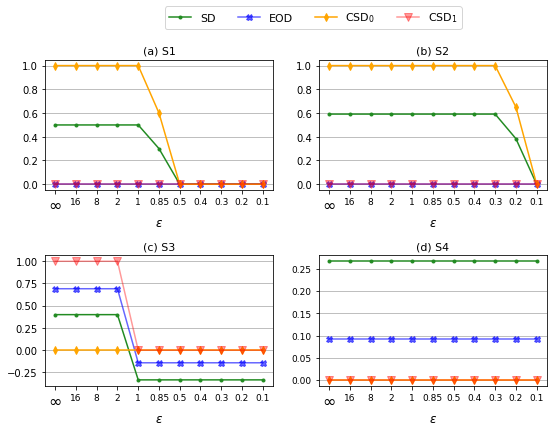

In [51]:
Make_subplots_2(lst_eps,'Synthetic_1_2_3_4')

## Displaying the results of fairness_privacy_Tradeoff for S5

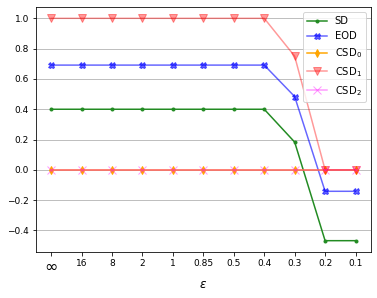

In [60]:
# specifying the plot size
plt.figure(figsize = (6, 4.5))
# plt.axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
plt.plot(sldp_spd5,color='forestgreen',label='SD',marker='o',markersize=3)
plt.plot(sldp_eod5,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
plt.plot(sldp_csd_b05,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
plt.plot(sldp_csd_b15,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
plt.plot(sldp_csd_b25,color='magenta', label='CSD$_{2}$',marker='x',markersize=8, alpha=0.4)
plt.xticks(range(len(lst_eps)),l,fontsize=9)
ax = plt.gca()
ax.get_xticklabels()[0].set_fontsize(16)
plt.yticks(fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12) 
plt.grid(axis='y')
plt.legend()

plt.savefig(path_results + dataset + "_S5.pdf", format="pdf", bbox_inches="tight")
plt.show()


## Displaying the results of fairness_privacy_Tradeoff for S6

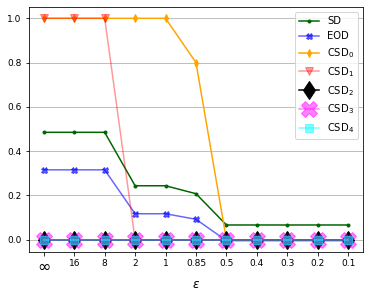

In [53]:
# # specifying the plot size
# plt.figure(figsize = (7, 5))
# plt.axvline(x=range(len(lst_eps))[0], color='black', label = 'noLDP',linestyle='dashed')
# plt.plot(sldp_spd6,color='forestgreen',label='SPD',marker='o',markersize=3)
# plt.plot(sldp_eod6,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
# plt.plot(sldp_csd_b06,color='orange',label='CSD$_{0}$',marker='d',markersize=13)
# plt.plot(sldp_csd_b16,color='red', label='CSD$_{1}$',marker='v',markersize=8)
# plt.plot(sldp_csd_b26,color='magenta', label='CSD$_{2}$',marker='x',markersize=20, alpha=0.4)
# plt.plot(sldp_csd_b06,color='black',label='CSD$_{3}$',marker='D',markersize=5)
# plt.plot(sldp_csd_b16,color='green', label='CSD$_{4}$',marker='X',markersize=14, alpha=0.3)
# plt.plot(sldp_csd_b26,color='chocolate', label='CSD$_{5}$',marker='s',markersize=14,alpha=0.4)

# #plt.xticks(range(len(lst_eps)))  

# #plt.xticklabels(range(len(lst_eps)))
# plt.xticks(range(len(lst_eps)), lst_eps)
# plt.yticks(fontsize=9)
# plt.xlabel(lst_eps,fontsize=9)
# plt.xlabel('$\epsilon$', fontsize=12)   
# plt.grid(axis='y')
# plt.title('S6',fontsize=12)
# # place legend outside
# plt.legend()


# plt.savefig(path_results + dataset + "_S6.pdf", format="pdf", bbox_inches="tight")
# plt.show()

plt.figure(figsize = (6, 4.5))
plt.plot(sldp_spd6,color='darkgreen',label='SD',marker='o',markersize=3)
plt.plot(sldp_eod6,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
# plt.plot(sldp_ped6,color='yellow',label='PED',marker='X',markersize=6, alpha=0.6)
plt.plot(sldp_csd_b06,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
plt.plot(sldp_csd_b16,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
plt.plot(sldp_csd_b26,color='black',label='CSD$_{2}$',marker='d',markersize=13)
plt.plot(sldp_csd_b36,color='magenta', label='CSD$_{3}$',marker='X',markersize=16, alpha=0.5)
plt.plot(sldp_csd_b46,color='cyan', label='CSD$_{4}$',marker='s',markersize=8,alpha=0.5)
plt.xticks(range(len(lst_eps)),l,fontsize=9)
ax = plt.gca()
ax.get_xticklabels()[0].set_fontsize(16)
plt.yticks(fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12) 
plt.grid(axis='y')
plt.legend()

plt.savefig(path_results + dataset + "_S6.pdf", format="pdf", bbox_inches="tight")
plt.show()



## Displaying the results of fairness_privacy_Tradeoff for S7

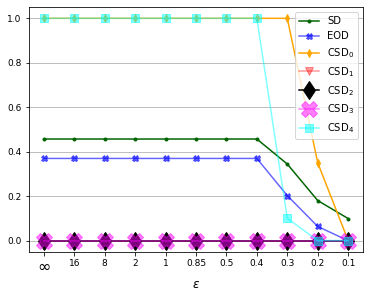

In [54]:
plt.figure(figsize = (6, 4.5))
plt.plot(sldp_spd7,color='darkgreen',label='SD',marker='o',markersize=3)
plt.plot(sldp_eod7,color='blue',label='EOD',marker='X',markersize=6, alpha=0.6)
plt.plot(sldp_csd_b07,color='orange',label='CSD$_{0}$',marker='d',markersize=5)
plt.plot(sldp_csd_b17,color='red', label='CSD$_{1}$',marker='v',markersize=8, alpha=0.4)
plt.plot(sldp_csd_b27,color='black',label='CSD$_{2}$',marker='d',markersize=13)
plt.plot(sldp_csd_b37,color='magenta', label='CSD$_{3}$',marker='X',markersize=16, alpha=0.5)
plt.plot(sldp_csd_b47,color='cyan', label='CSD$_{4}$',marker='s',markersize=8,alpha=0.5)
plt.xticks(range(len(lst_eps)),l,fontsize=9)
ax = plt.gca()
ax.get_xticklabels()[0].set_fontsize(16)
plt.yticks(fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12) 
plt.grid(axis='y')
plt.legend()

plt.savefig(path_results + dataset + "_S7.pdf", format="pdf", bbox_inches="tight")
plt.show()



## Results for the Impact of the LDP on Fairness when considering groups individually (S1, S2, S3, & S4)

In [63]:
def Make_subplots3(lst_eps,dataset_name):    
    fig2, ax2 = plt.subplots(2, 2, figsize=(10, 6),sharex=False, sharey=False)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    #plt.yticks(fontsize=5)
    
    #S1
    ax2[0,0].plot(sldp_sp_maj1, label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5)
    ax2[0,0].plot(sldp_sp_min1, label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)
    ax2[0,0].plot(sldp_eo_maj1,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid', marker='d',alpha=0.5)
    ax2[0,0].plot(sldp_eo_min1,  label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')
    #ax2[0,0].legend(bbox_to_anchor = (4.25,0.9) ,ncol=1,fontsize='8') 

    # S2:

    ax2[0,1].plot(sldp_sp_maj2,label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5)
    ax2[0,1].plot(sldp_sp_min2,label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)
    ax2[0,1].plot(sldp_eo_maj2,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid', marker='d',alpha=0.5)
    ax2[0,1].plot(sldp_eo_min2,  label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')
    # S3:
    ax2[1,0].plot(sldp_sp_maj3, label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5)
    ax2[1,0].plot(sldp_sp_min3,  label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)    
    ax2[1,0].plot(sldp_eo_maj3,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid', marker='d',alpha=0.5)
    ax2[1,0].plot(sldp_eo_min3, label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')
    
     # S5:

    ax2[1,1].plot(sldp_sp_maj5,label = r'$P[\hat{Y}=1|A=1]$', color='forestgreen',linestyle='solid', marker='o',alpha=0.5)
    ax2[1,1].plot(sldp_sp_min5,label = r'$P[\hat{Y}=1|A=0]$', color='magenta',linestyle='dashed', marker='X',markersize=8)
    ax2[1,1].plot(sldp_eo_maj5,  label = r'$P[\hat{Y}=1|Y=1,A=1]$',color='blue', linestyle='solid', marker='d',alpha=0.5)
    ax2[1,1].plot(sldp_eo_min5,  label = r'$P[\hat{Y}=1|Y=1,A=0]$',color='orange',linestyle='dashed', marker='.')

        
    ax2[0,0].set_title('(a) S1',fontsize=12)
    ax2[0,1].set_title('(b) S2',fontsize=12)
    ax2[1,0].set_title('(c) S3',fontsize=12)
    ax2[1,1].set_title('(d) S5',fontsize=12)


    for i in range(2):
        for j in range(2):
#             ax2[i,j].set_xticks(range(len(lst_eps)))        
#             ax2[i,j].set_xticklabels(lst_eps,fontsize=10)
            ax2[i,j].set_xticks(range(len(lst_eps)), labels = l,fontsize=9) 
            ax2[i,j].get_xticklabels()[0].set_fontsize(16)
            ax2[i,j].set_xlabel('$\epsilon$', fontsize=12)
            ax2[i,j].grid(axis='y')
            ax2[i,j].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax2[0,0].legend(loc = 'upper right',bbox_to_anchor = (2.23,1.4) ,ncol=4,fontsize='11')        
    # saving the plot as a pdf file
    fig2.savefig(path_results + dataset + '_separate.pdf',dpi=100,bbox_inches='tight')
    
    return fig2.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


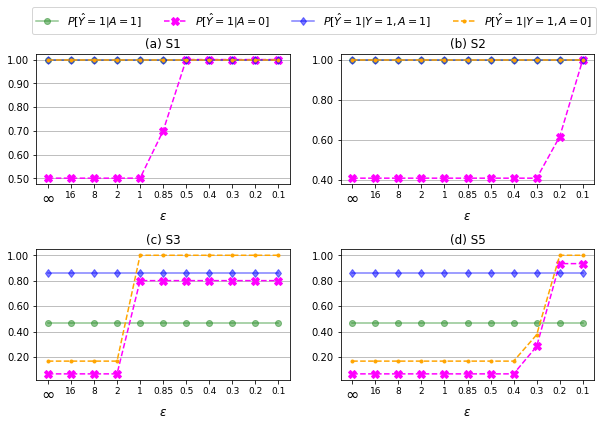

In [64]:
#lst_eps = [16,8,5,4,3,2.9,2.8,2.7,2.6,2.5,2.4,2.3,2.2,2.1,2,1.9,1.8,1.7,1.6,1.5,1.4,1.3,1.2,1.1,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
Make_subplots3(lst_eps,'Synthetic')

## Computing the accuracy for all the datasets

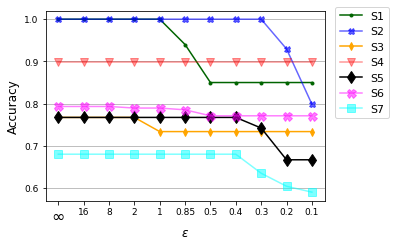

In [57]:
plt.figure(figsize = (5, 3.5))
plt.plot(acc1,color='darkgreen',label='S1',marker='o',markersize=3)
plt.plot(acc2,color='blue',label='S2',marker='X',markersize=6, alpha=0.6)
plt.plot(acc3,color='orange',label='S3',marker='d',markersize=5)
plt.plot(acc4,color='red', label='S4',marker='v',markersize=8, alpha=0.4)
plt.plot(acc5,color='black',label='S5',marker='d',markersize=9)
plt.plot(acc6,color='magenta', label='S6',marker='X',markersize=9, alpha=0.5)
plt.plot(acc7,color='cyan', label='S7',marker='s',markersize=8,alpha=0.5)
plt.xticks(range(len(lst_eps)),l,fontsize=9)
ax = plt.gca()
ax.get_xticklabels()[0].set_fontsize(16)
plt.yticks(fontsize=9)
plt.xlabel('$\epsilon$', fontsize=12) 
plt.ylabel('Accuracy',fontsize=12)
plt.grid(axis='y')
plt.legend(loc = 'upper right',bbox_to_anchor = (1.25,1.05) ,ncol=1,fontsize='11')

plt.savefig(path_results + dataset + "_accuracy.pdf", format="pdf", bbox_inches="tight")
plt.show()
